In [1]:
import os

os.chdir('/home/ubuntu/snake-rl/')

from src.env import SnakeEnv
from src.models.CNN2_relative import DQN
import json
import torch
import matplotlib.pyplot as plt
from pprint import pprint

from src.replaymemory import *

In [2]:
with open('config.json') as f:
    config = json.load(f)

config['env']['action_space_type']='absolute'
pprint(config['env'])
env=SnakeEnv(**config['env'])

{'action_space_type': 'absolute',
 'food_reward': 1000,
 'height': 10,
 'history_length': 2,
 'max_steps': 500,
 'observation_type': 'full',
 'periodic': False,
 'step_penalty': -1,
 'terminated_penalty': -1000,
 'width': 10}


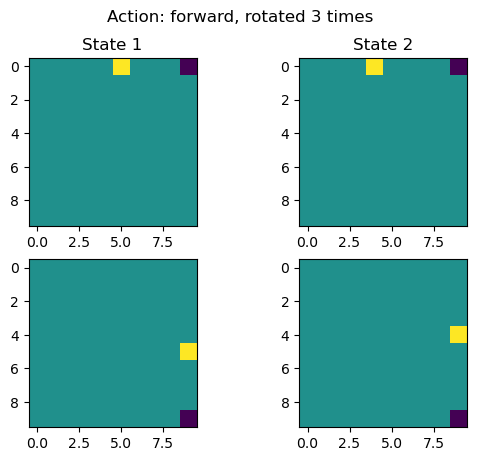

In [3]:
s1,_=env.reset(123)
a = 2 # go forward
s2,r,done,_ = env.step(a)

k=3

input_shape=s1.shape

fig,axs = plt.subplots(2,input_shape[0])

fig.suptitle('Action: forward, rotated {} times'.format(k))

for i,(frame,ax) in enumerate(zip([s1[0],s2[0]],axs[0])):

    ax.imshow(frame)
    ax.set_title('State {}'.format(i+1))
    # ax.set_xticks([],[])
    # ax.set_yticks([],[])

s1_rot = np.rot90(s1,k=k,axes=(1,2))
s2_rot = np.rot90(s2,k=k,axes=(1,2))

for i,(frame,ax) in enumerate(zip([s1_rot[0],s2_rot[0]],axs[1])):
    ax.imshow(frame)
    # ax.set_title('State {} rot'.format(i+1))
    # ax.set_xticks([],[])
    # ax.set_yticks([],[])

In [4]:
pprint(env._int_to_direction)

print(a)

rot_mat=np.array([[0,1],[-1,0]])
print(env._int_to_direction[a])
rot_mat @ env._int_to_direction[a]

{0: array([0, 1]), 1: array([1, 0]), 2: array([ 0, -1]), 3: array([-1,  0])}
2
[ 0 -1]


array([-1,  0])

In [20]:
from src.replaymemory import ReplayMemory

replay_memory = ReplayMemory(10,s1.shape,'absolute')

replay_memory._add_sample(s1,a,r,s2,done)

print(replay_memory.__len__())


4


In [24]:
print(replay_memory[0]['s'][0])
print(replay_memory[0]['a'].item())
print(env._int_to_direction[replay_memory[0]['a'].item()])
print(replay_memory[0]['s2'][0])

print('\n\n\n')

print(replay_memory[2]['s'][0])
print(replay_memory[2]['a'])
print(env._int_to_direction[replay_memory[2]['a'].item()])
print(replay_memory[2]['s2'][0])

tensor([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
2
[ 0 -1]
tensor([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 